In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
dataset = pd.read_csv('Moscow_1704546.csv')
dataset.head()

,acct_doc_header_id,company_id,doc_number,doc_number_norm,business_code,create_year,document_line_number,document_type,cust_number,cust_number_norm,...,debit_credit_status,payment_method,document_create_date.1,invoice_currency,doc_id,actual_outstanding_amount,payment_amount,days_past_duedate,age_invoice,dispute_amount
0,531857518,60,28914190,28914190,nuus8,NaN,NaN,RI,218997,218997,...,NaN,NaN,NaN,34973.45,531857518,34973.45,34973.45,94,154,NaN
1,537314511,60,36588134,36588134,Paks10,NaN,NaN,RI,228113,228113,...,NaN,NaN,NaN,8774.55,537314511,8774.55,8774.55,2,62,NaN
2,535770434,60,33773249,33773249,seod1,NaN,NaN,RI,219010,219010,...,NaN,NaN,NaN,13189.94,535770434,13189.94,13189.94,3,70,NaN
3,544521287,60,49298987,49298987,HYON10,NaN,NaN,RI,228140,228140,...,NaN,NaN,NaN,349.99,544521287,349.99,349.99,1,61,NaN
4,537724229,60,37237255,37237255,deer10,NaN,NaN,RI,228078,228078,...,NaN,NaN,NaN,25229.56,537724229,25229.56,25229.56,-5,55,NaN


## 1.PreProcessing Data

In [4]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

dataset['name_customer'] = enc.fit_transform(dataset[['name_customer']])

In [5]:
dataset.drop(['business_code','acct_doc_header_id','doc_number','document_type','invoice_id','invoice_id_norm','baseline_create_date','shipping_date','invoice_date_norm'],axis=1,inplace=True)

## 2. Splitting the Data

In [6]:
train,test = dataset[dataset['clear_date'].isnull().apply(lambda x: not x)],dataset[dataset['clear_date'].isnull()]

## 3. Sorting on the basis of clear date

In [7]:
train.sort_values('clear_date',inplace=True)
train.head()

,company_id,doc_number_norm,create_year,document_line_number,cust_number,cust_number_norm,customer_map_id,name_customer,division,document_create_date,...,debit_credit_status,payment_method,document_create_date.1,invoice_currency,doc_id,actual_outstanding_amount,payment_amount,days_past_duedate,age_invoice,dispute_amount
38467,60,28341281,NaN,NaN,228453,228453,-1,39.0,NaN,2017-05-01,...,NaN,NaN,NaN,20823.50,531519291,20823.50,20823.50,89,149,NaN
9304,60,28333026,NaN,NaN,218995,218995,-1,32.0,NaN,2017-05-01,...,NaN,NaN,NaN,2568.83,531518574,2568.83,2568.83,89,149,NaN
34480,60,28343033,NaN,NaN,228097,228097,-1,50.0,NaN,2017-05-01,...,NaN,NaN,NaN,1707.38,531519361,1707.38,1707.38,89,149,NaN
24140,60,28342976,NaN,NaN,228097,228097,-1,50.0,NaN,2017-05-01,...,NaN,NaN,NaN,14159.75,531519363,14159.75,14159.75,89,149,NaN
22786,60,28342961,NaN,NaN,228097,228097,-1,50.0,NaN,2017-05-01,...,NaN,NaN,NaN,10621.39,531519379,10621.39,10621.39,89,149,NaN


## Using unique instances of doc_number

In [8]:
print(len(train['doc_number_norm'].unique()))
train.drop_duplicates('doc_number_norm',keep='first',inplace=True)
print(train.shape)
train.head()

41558
(41558, 38)


,company_id,doc_number_norm,create_year,document_line_number,cust_number,cust_number_norm,customer_map_id,name_customer,division,document_create_date,...,debit_credit_status,payment_method,document_create_date.1,invoice_currency,doc_id,actual_outstanding_amount,payment_amount,days_past_duedate,age_invoice,dispute_amount
38467,60,28341281,NaN,NaN,228453,228453,-1,39.0,NaN,2017-05-01,...,NaN,NaN,NaN,20823.50,531519291,20823.50,20823.50,89,149,NaN
9304,60,28333026,NaN,NaN,218995,218995,-1,32.0,NaN,2017-05-01,...,NaN,NaN,NaN,2568.83,531518574,2568.83,2568.83,89,149,NaN
34480,60,28343033,NaN,NaN,228097,228097,-1,50.0,NaN,2017-05-01,...,NaN,NaN,NaN,1707.38,531519361,1707.38,1707.38,89,149,NaN
24140,60,28342976,NaN,NaN,228097,228097,-1,50.0,NaN,2017-05-01,...,NaN,NaN,NaN,14159.75,531519363,14159.75,14159.75,89,149,NaN
22786,60,28342961,NaN,NaN,228097,228097,-1,50.0,NaN,2017-05-01,...,NaN,NaN,NaN,10621.39,531519379,10621.39,10621.39,89,149,NaN


## 4. Feature Engineering

In [9]:
train['clear_date'].equals(train['clear_date_norm']),train['document_create_date'].equals(train['document_create_date_norm'])

(True, True)

In [10]:
train.drop(['clear_date','document_create_date'],axis=1,inplace=True)

In [11]:
from sklearn.feature_selection import VarianceThreshold
vts = VarianceThreshold(threshold=0.1)

In [12]:
dates = train[['document_create_date_norm']]
train.drop(['clear_date_norm','document_create_date_norm'],axis=1,inplace=True)

In [13]:
vts.fit(train)

VarianceThreshold(threshold=0.1)

In [14]:
train.columns[list(vts.get_support())]

Index(['doc_number_norm', 'cust_number', 'cust_number_norm', 'name_customer',
       'cust_payment_terms', 'invoice_currency', 'doc_id',
       'actual_outstanding_amount', 'payment_amount', 'days_past_duedate',
       'age_invoice'],
      dtype='object')

In [15]:
train = train[train.columns[list(vts.get_support())]]

In [16]:
train.corr()

,doc_number_norm,cust_number,cust_number_norm,name_customer,cust_payment_terms,invoice_currency,doc_id,actual_outstanding_amount,payment_amount,days_past_duedate,age_invoice
doc_number_norm,1.000000,-0.063325,-0.063325,0.043375,0.171879,-0.016908,0.994801,-0.016908,-0.013203,-0.369403,-0.350627
cust_number,-0.063325,1.000000,1.000000,-0.313034,-0.304181,-0.013978,-0.062534,-0.013978,-0.010707,-0.021495,-0.053964
cust_number_norm,-0.063325,1.000000,1.000000,-0.313034,-0.304181,-0.013978,-0.062534,-0.013978,-0.010707,-0.021495,-0.053964
name_customer,0.043375,-0.313034,-0.313034,1.000000,0.150725,-0.018768,0.040718,-0.018768,-0.017552,0.002566,0.018664
cust_payment_terms,0.171879,-0.304181,-0.304181,0.150725,1.000000,0.024992,0.179088,0.024992,0.023613,-0.042929,0.063940
invoice_currency,-0.016908,-0.013978,-0.013978,-0.018768,0.024992,1.000000,-0.015673,1.000000,0.980998,0.052852,0.055462
doc_id,0.994801,-0.062534,-0.062534,0.040718,0.179088,-0.015673,1.000000,-0.015673,-0.011937,-0.400619,-0.381037
actual_outstanding_amount,-0.016908,-0.013978,-0.013978,-0.018768,0.024992,1.000000,-0.015673,1.000000,0.980998,0.052852,0.055462
payment_amount,-0.013203,-0.010707,-0.010707,-0.017552,0.023613,0.980998,-0.011937,0.980998,1.000000,0.061561,0.064014
days_past_duedate,-0.369403,-0.021495,-0.021495,0.002566,-0.042929,0.052852,-0.400619,0.052852,0.061561,1.000000,0.994289


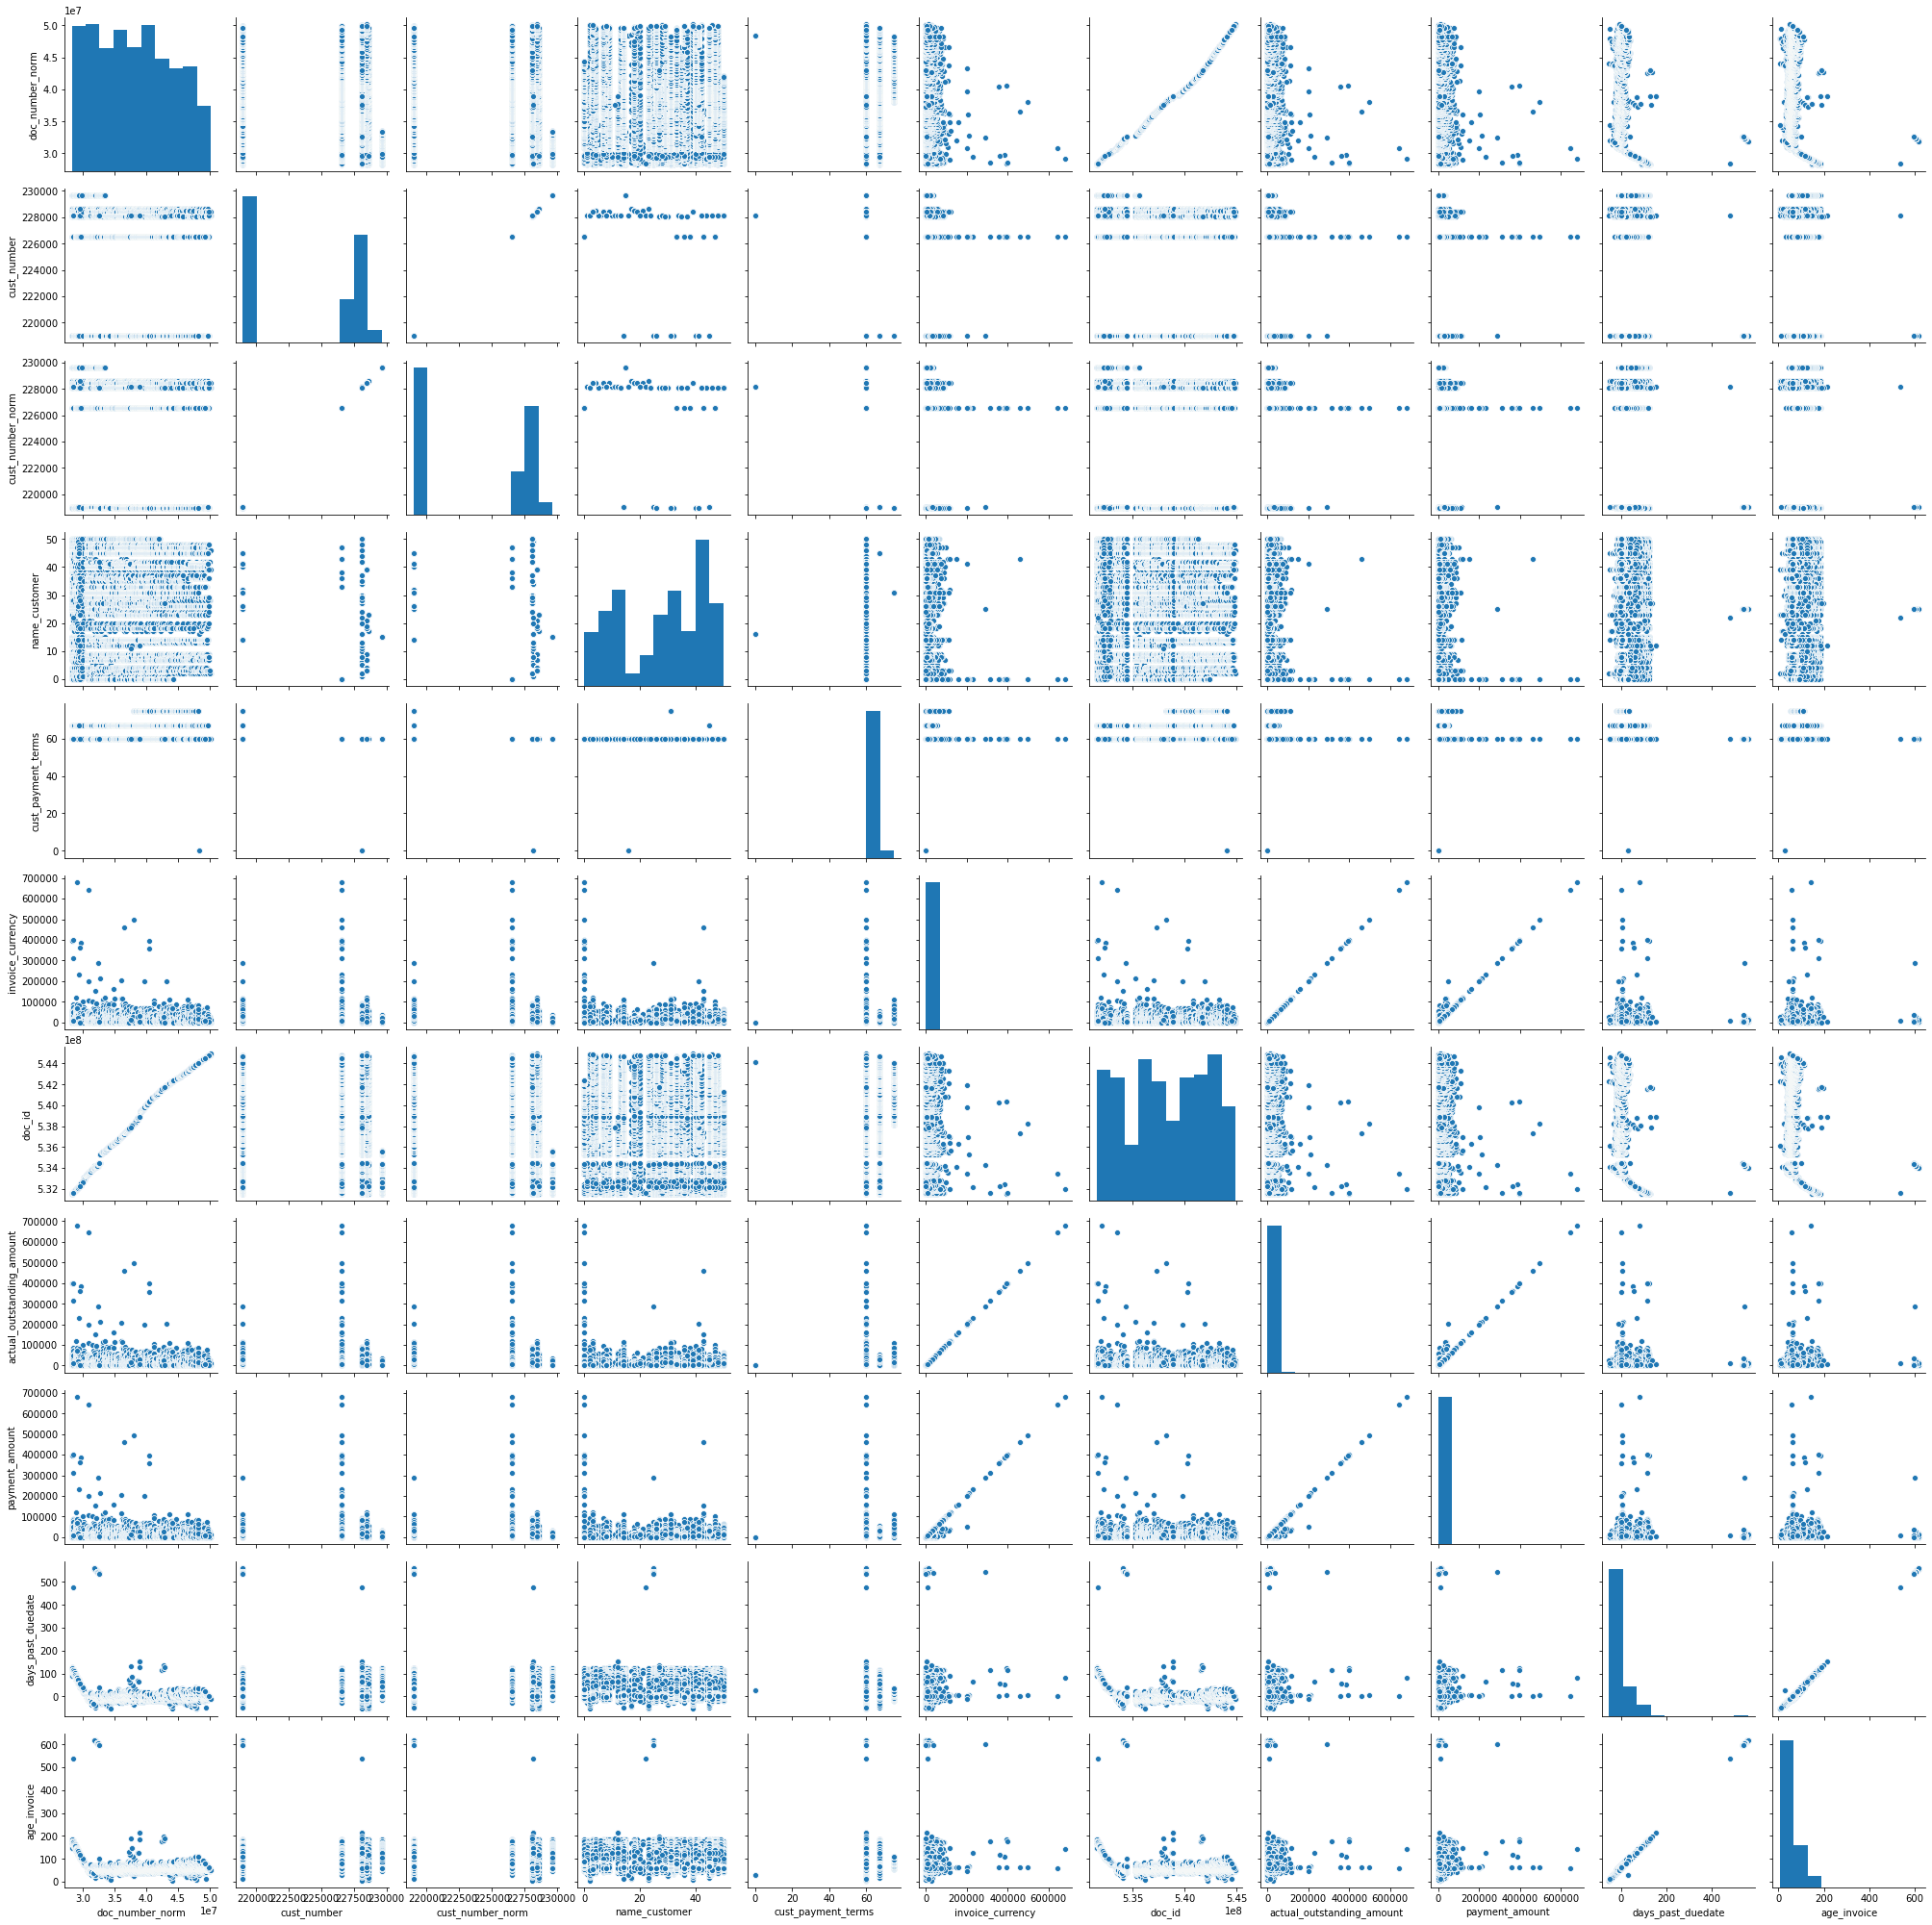

In [17]:
sns.pairplot(train)

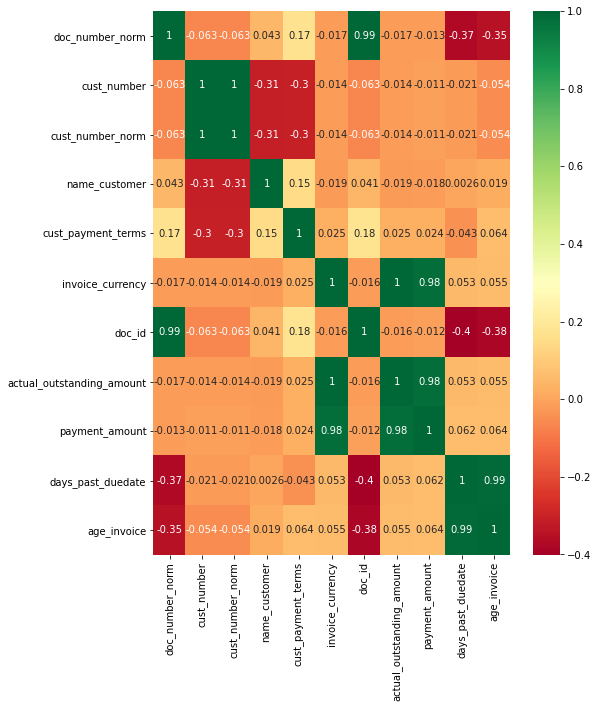

In [19]:
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,10))
g=sns.heatmap(train[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [20]:
train.drop(['cust_number','actual_outstanding_amount','days_past_duedate'],axis=1,inplace=True)

In [21]:
train = pd.merge(train,dates,right_index=True,left_index=True)

In [22]:
train.drop(['doc_number_norm','doc_id'],axis=1,inplace=True)

In [23]:
train.drop(['cust_number_norm'],axis=1,inplace=True)

In [24]:
train.drop(['document_create_date_norm'],axis=1,inplace=True)

In [25]:
train = pd.DataFrame(train.values,columns=train.columns)

In [26]:
train

,name_customer,cust_payment_terms,invoice_currency,payment_amount,age_invoice
0,39.0,60.0,20823.50,20823.50,149.0
1,32.0,60.0,2568.83,2568.83,149.0
2,50.0,60.0,1707.38,1707.38,149.0
3,50.0,60.0,14159.75,14159.75,149.0
4,50.0,60.0,10621.39,10621.39,149.0
...,...,...,...,...,...
41553,33.0,60.0,3843.02,3843.02,91.0
41554,48.0,60.0,16485.43,16485.43,61.0
41555,39.0,60.0,4151.95,4151.95,62.0
41556,33.0,60.0,5559.23,5559.23,82.0


## Model 1

In [27]:
train_m1 = train
test_m1 = test

In [28]:
y = []
for i,j in zip(train_m1['invoice_currency'],train_m1['payment_amount']):
    
    if i == j:
        
        y.append(1)
    elif j==0:
        
        y.append(-1)
    else:
        
        y.append(0)

##### classifier model 
#### 1. whether they will be able to pay full or not
#### 0. whether they will be able to pay partial or not
#### -1. they cannot pay properly

In [29]:
train_m1['full_partial_null'] = pd.Series(y)

In [30]:
x,y = train_m1.drop(['full_partial_null','payment_amount'],axis=1),train_m1['full_partial_null']

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,test_size=0.2)

In [34]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [35]:
print(model.feature_importances_)

[0.1633345  0.03657007 0.29884219 0.50125323]


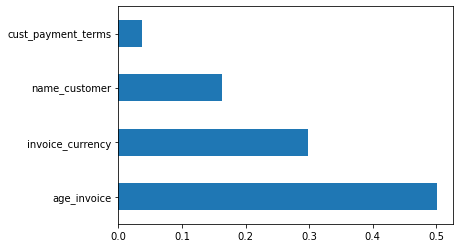

In [37]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
model_verifier = RFE(RandomForestClassifier(n_jobs=4),n_features_to_select=3)
model_verifier.fit(x,y)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=4,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=3, step=1, verbose=0)

In [39]:
x.columns[list(model_verifier.get_support())]

Index(['name_customer', 'invoice_currency', 'age_invoice'], dtype='object')

In [40]:
model = RandomForestClassifier(n_jobs=4,verbose=True,n_estimators=200)

In [41]:
model.fit(x_train,y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.9s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=4,
                       oob_score=False, random_state=None, verbose=True,
                       warm_start=False)

In [42]:
model.score(x_test,y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


0.9772617901828682

97% accuracy

In [43]:
train_partial_payed = train_m1[train_m1['full_partial_null'] == 0]

In [44]:
train_partial_payed

,name_customer,cust_payment_terms,invoice_currency,payment_amount,age_invoice,full_partial_null
7,8.0,60.0,31848.72,11979.02,171.0,0
8,4.0,60.0,6575.41,3477.20,175.0,0
9,3.0,60.0,5512.98,1326.17,161.0,0
10,32.0,60.0,13850.52,5308.76,167.0,0
11,14.0,60.0,32248.27,5061.21,176.0,0
...,...,...,...,...,...,...
41092,33.0,60.0,5987.23,740.40,76.0,0
41093,8.0,60.0,3104.41,1665.57,63.0,0
41145,45.0,67.0,4520.67,2271.86,60.0,0
41203,46.0,60.0,423.26,91.65,48.0,0


In [45]:
x,y = train_partial_payed.drop(['full_partial_null','payment_amount'],axis=1),train_partial_payed['payment_amount']

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,test_size=0.2)

In [47]:
from sklearn.linear_model import Lasso
model_regressor = Lasso()

In [48]:
model_regressor.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [49]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(model_regressor.predict(x_test),y_test))

2982.452351799998

## Model 2

In [50]:
train_m2 = train

In [51]:
train_m2['days_pay'] = train_m2['payment_amount'] / train_m2['age_invoice']
x,y = train_m2.drop(['invoice_currency','full_partial_null','payment_amount','days_pay'],axis=1),train_m2['days_pay']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,test_size=0.2)
model = Lasso()
model.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [52]:
ypred = model.predict(x_test)


In [53]:
ypred *= x_test['age_invoice']
y_test *= x_test['age_invoice']

In [54]:
np.sqrt(mean_squared_error(ypred,y_test))

12306.033198346746

## Model 3

In [55]:
train_m3 = train

In [56]:
su = 0
count = 0
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
for name,group in train_m3.groupby('name_customer'):
    
    model = ElasticNet()
    x,y = group[['cust_payment_terms','age_invoice','invoice_currency']],group['payment_amount']
    train_x,test_x,train_y,test_y = train_test_split(x,y,shuffle=True,test_size=0.2)
    model.fit(train_x,train_y)
    print(name," { ",np.sqrt(mean_squared_error(model.predict(test_x),test_y))," } ")
    su += np.sqrt(mean_squared_error(model.predict(test_x),test_y))
    count += 1
print(su / count)

0.0  {  1268.6457979973027  } 
1.0  {  5580.226374037386  } 
2.0  {  1643.001425120474  } 
3.0  {  1041.0453658548463  } 
4.0  {  393.001251411528  } 
5.0  {  3.624653800216038e-05  } 
6.0  {  4.555485244311503e-05  } 
7.0  {  859.581467215105  } 
8.0  {  1699.4434085868813  } 
9.0  {  2615.4652861514046  } 
10.0  {  0.0002013460634069707  } 


ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [52]:
pip install scikit-learn==0.19.1

  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Running setup.py install for scikit-learn: started
    Running setup.py install for scikit-learn: finished with status 'error'
  Rolling back uninstall of scikit-learn
  Moving to c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\scikit_learn-0.22.2.post1.dist-info\
   from c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\~cikit_learn-0.22.2.post1.dist-info
  Moving to c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\sklearn\
   from c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\~klearn
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'c:\users\kiit\appdata\local\programs\python\python37\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\KIIT\\AppData\\Local\\Temp\\pip-install-ykp7_if8\\scikit-learn\\setup.py'"'"'; __file__='"'"'C:\\Users\\KIIT\\AppData\\Local\\Temp\\pip-install-ykp7_if8\\scikit-learn\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\KIIT\AppData\Local\Temp\pip-record-dt6i4ook\install-record.txt' --single-version-externally-managed --compile
         cwd: C:\Users\KIIT\AppData\Local\Temp\pip-install-ykp7_if8\scikit-learn\
    Complete output (617 lines):
    Partial import of sklearn during the build process.
    blas_opt_info:
    blas_mkl_info:
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize M

    copying sklearn\feature_extraction\__init__.py -> build\lib.win-amd64-3.7\sklearn\feature_extraction
    creating build\lib.win-amd64-3.7\sklearn\feature_extraction\tests
    copying sklearn\feature_extraction\tests\test_dict_vectorizer.py -> build\lib.win-amd64-3.7\sklearn\feature_extraction\tests
    copying sklearn\feature_extraction\tests\test_feature_hasher.py -> build\lib.win-amd64-3.7\sklearn\feature_extraction\tests
    copying sklearn\feature_extraction\tests\test_image.py -> build\lib.win-amd64-3.7\sklearn\feature_extraction\tests
    copying sklearn\feature_extraction\tests\test_text.py -> build\lib.win-amd64-3.7\sklearn\feature_extraction\tests
    copying sklearn\feature_extraction\tests\__init__.py -> build\lib.win-amd64-3.7\sklearn\feature_extraction\tests
    creating build\lib.win-amd64-3.7\sklearn\manifold
    copying sklearn\manifold\isomap.py -> build\lib.win-amd64-3.7\sklearn\manifold
    copying sklearn\manifold\locally_linear.py -> build\lib.win-amd64-3.7\skl

In [59]:
su = 0
count = 0
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
for name,group in train_m3.groupby('name_customer'):
    
    model = ElasticNet()
    x,y = group[['cust_payment_terms','age_invoice','invoice_currency']],group['payment_amount']
    train_x,test_x,train_y,test_y = train_test_split(x,y,shuffle=True,test_size=0.2)
    model.fit(train_x,train_y)
    print(name," { ",np.sqrt(mean_squared_error(model.predict(test_x),test_y))," } ")
    su += np.sqrt(mean_squared_error(model.predict(test_x),test_y))
    count += 1
print(su / count)

0.0  {  2103.18103331545  } 
1.0  {  1777.4352277796609  } 
2.0  {  3687.3113600243805  } 
3.0  {  1467.3082368908094  } 
4.0  {  650.5064423393544  } 
5.0  {  1.663934381213039e-05  } 
6.0  {  5.477919555518873e-05  } 
7.0  {  1709.414297851095  } 
8.0  {  1700.8550873313545  } 
9.0  {  2077.8769756400256  } 
10.0  {  0.0002339024841721695  } 


ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

## Model 4

In [57]:
train_m4 = train

In [58]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

model = ElasticNetCV(cv=5,fit_intercept=True,tol=0.0001)
x = train_m4[['cust_payment_terms','age_invoice','name_customer','invoice_currency']]
y = train_m4['payment_amount']
train_x,test_x,train_y,test_y = train_test_split(x,y,shuffle=True,test_size=0.2)
model.fit(train_x,train_y)
print(" { ",np.sqrt(mean_squared_error(model.predict(test_x),test_y))," } ")

 {  2342.752301324214  } 


## Model 5

In [59]:
train_m5 = train

In [60]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

model = ElasticNetCV(cv=5,fit_intercept=True,tol=0.0001)
x = train_m5[['cust_payment_terms','age_invoice','name_customer']]
x['invoice_currency'] = train_m5['invoice_currency'] / train_m5['age_invoice']
y = train_m5['payment_amount']
train_x,test_x,train_y,test_y = train_test_split(x,y,shuffle=True,test_size=0.2)
model.fit(train_x,train_y)
print(" { ",np.sqrt(mean_squared_error(model.predict(test_x),test_y))," } ")

 {  6378.362939934141  } 


 5. Now filtering the columns of the test data like the train dataset and predicting the payment amount from the two best models
    1. One who uses invoices_currency-model4
    2. One who does not uses invoice_currency-model5

In [61]:
test_m4 = test

In [62]:
test_m4 = test_m4[['cust_payment_terms','age_invoice','name_customer','invoice_currency']]

In [63]:
from sklearn.linear_model import ElasticNetCV
model = ElasticNetCV(cv=5,fit_intercept=True,tol=0.0001)
x = train_m4[['cust_payment_terms','age_invoice','name_customer','invoice_currency']]
y = train_m4['payment_amount']
model.fit(x,y)
test_m4['payment_amount'] = model.predict(test_m4)

In [64]:
test_m4

,cust_payment_terms,age_invoice,name_customer,invoice_currency,payment_amount
43852,60,43,8.0,31052.25,29910.387216
43853,60,79,23.0,36045.95,34712.931483
43854,60,49,36.0,499.98,527.639132
43855,60,41,8.0,3876.87,3775.263880
43856,60,22,14.0,9460.93,9145.569533
...,...,...,...,...,...
48847,60,50,28.0,11139.07,10759.471376
48848,60,54,36.0,720.00,739.236903
48849,60,12,41.0,4266.68,4150.152196
48850,75,15,31.0,16853.13,16254.800709


In [65]:
test_m5 = test

In [66]:
test_m5_x = test_m5[['cust_payment_terms','age_invoice','name_customer','invoice_currency']]
test_m5_x['invoice_currency'] = test_m5_x['invoice_currency'] / test_m5_x['age_invoice']

In [67]:
test_m5_x['invoice_currency']

43852     722.145349
43853     456.277848
43854      10.203673
43855      94.557805
43856     430.042273
            ...     
48847     222.781400
48848      13.333333
48849     355.556667
48850    1123.542000
48851     131.505000
Name: invoice_currency, Length: 5000, dtype: float64

In [68]:
from sklearn.linear_model import ElasticNetCV
model = ElasticNetCV(cv=5,fit_intercept=True,tol=0.0001)
x = train_m5[['cust_payment_terms','age_invoice','name_customer']]
x['invoice_currency'] = train_m5['invoice_currency'] / train_m5['age_invoice']
y = train_m5['payment_amount']
model.fit(x,y)
test_m5_x['payment_amount'] = model.predict(test_m5_x)

In [69]:
test_m5_x['invoice_currency'] *= test_m5_x['age_invoice']

In [70]:
test_m5_x

,cust_payment_terms,age_invoice,name_customer,invoice_currency,payment_amount
43852,60,43,8.0,31052.25,41613.683953
43853,60,79,23.0,36045.95,27135.908317
43854,60,49,36.0,499.98,1132.343082
43855,60,41,8.0,3876.87,5790.665947
43856,60,22,14.0,9460.93,24560.078253
...,...,...,...,...,...
48847,60,50,28.0,11139.07,13272.499314
48848,60,54,36.0,720.00,1405.522502
48849,60,12,41.0,4266.68,20123.447224
48850,75,15,31.0,16853.13,63970.911561


In [71]:
import pickle


In [73]:
file = open('1704546.pkl', 'wb')
pickle.dump(model, file)